<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/loan-approval/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.shape

(58645, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [6]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


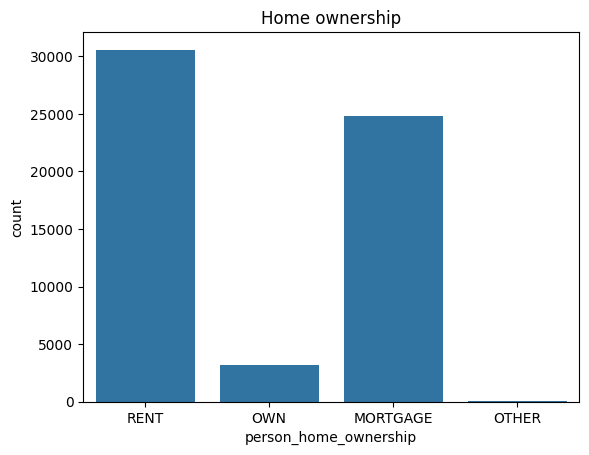

In [7]:
sns.countplot(data=df,x='person_home_ownership')
plt.title('Home ownership')
plt.show()

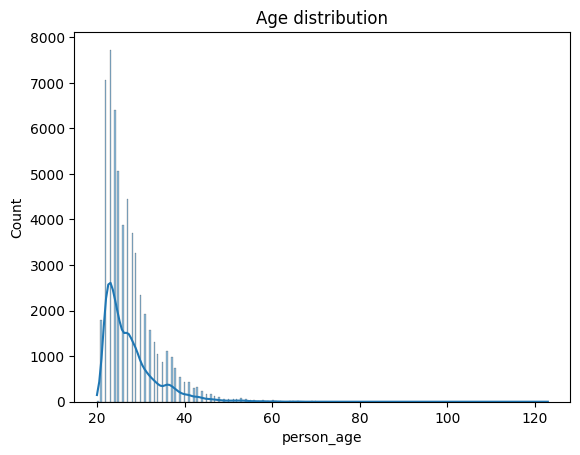

In [8]:
sns.histplot(data=df,x='person_age',kde=True)
plt.title('Age distribution')
plt.show()

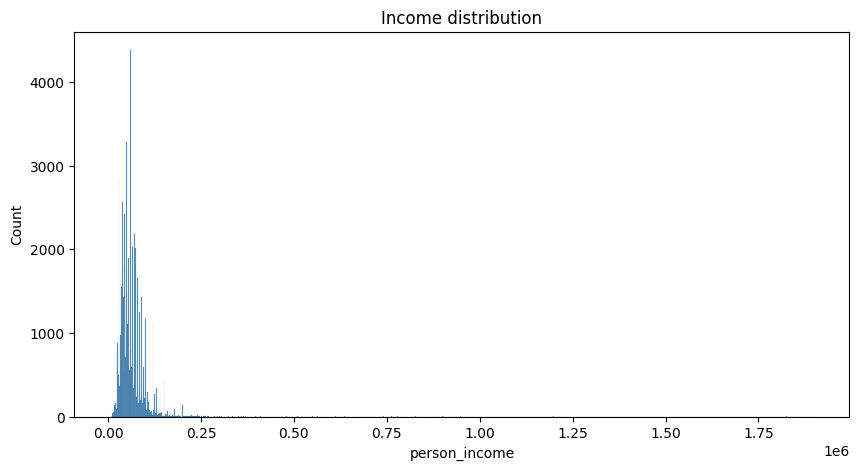

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='person_income')
plt.title('Income distribution')
plt.show()


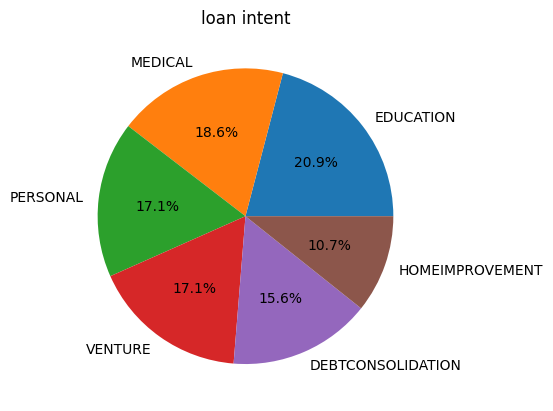

In [10]:
loan_type=df['loan_intent'].value_counts().reset_index()
loan_type
plt.pie(loan_type['count'],labels=loan_type['loan_intent'],autopct='%1.1f%%')
plt.title('loan intent')
plt.show()

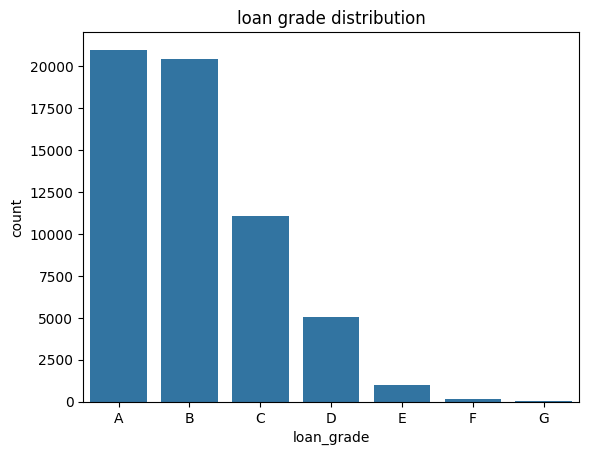

In [11]:
sns.countplot(data=df,x='loan_grade',order=df['loan_grade'].value_counts().index)
plt.title('loan grade distribution')
plt.show()

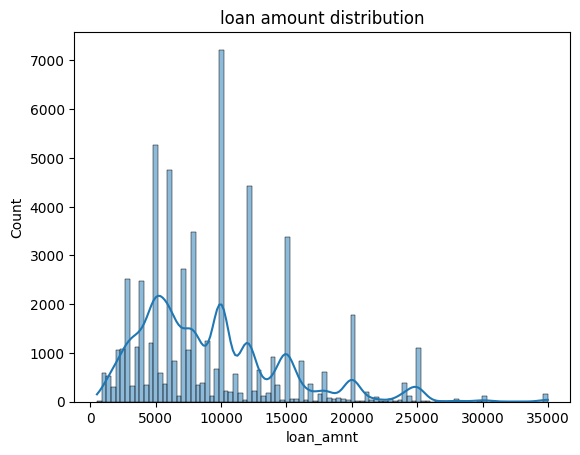

In [12]:
sns.histplot(data=df,x='loan_amnt',kde=True)
plt.title('loan amount distribution')
plt.show()

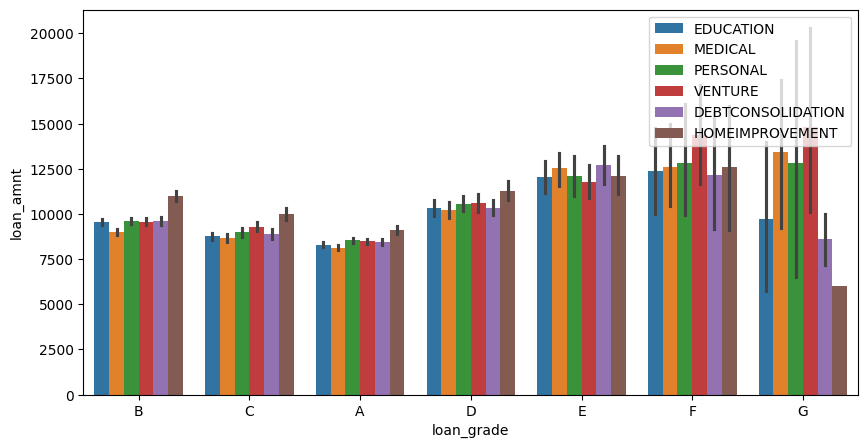

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='loan_grade',y='loan_amnt',hue='loan_intent')
plt.legend(loc='upper right')

<Axes: xlabel='loan_amnt', ylabel='loan_int_rate'>

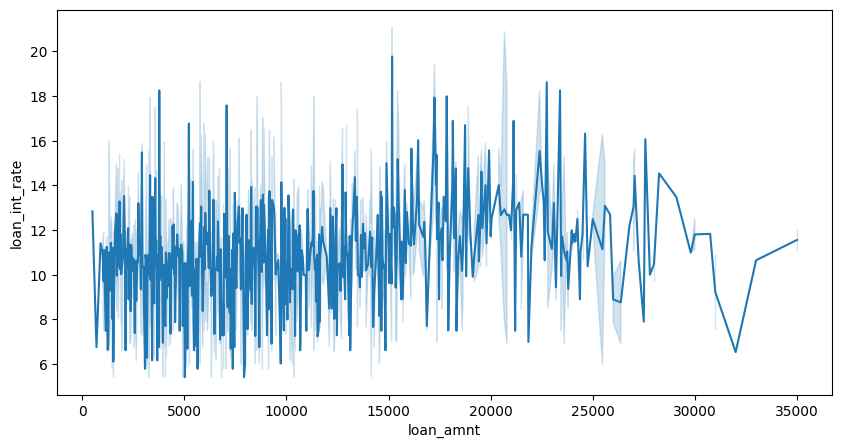

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='loan_amnt',y='loan_int_rate')

In [15]:
df['loan_status'].value_counts().reset_index()

,loan_status,count
0,0,50295
1,1,8350


In [16]:
df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt']
df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']
df['employment_stability'] = df['person_emp_length'] * df['person_income']
df['interest_amount'] = df['loan_amnt'] * (df['loan_int_rate'] / 100)
loan_grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['loan_grade_ordinal'] = df['loan_grade'].map(loan_grade_mapping)
df['credit_risk_score'] = df['cb_person_cred_hist_length'] / (df['loan_grade_ordinal'] + 1)


In [17]:
def employment_tenure_category(emp_length):
    if emp_length < 1:
        return 'Less than 1 year'
    elif 1 <= emp_length < 5:
        return '1-5 years'
    elif 5 <= emp_length < 10:
        return '5-10 years'
    else:
        return '10+ years'

df['employment_tenure_category'] = df['person_emp_length'].apply(employment_tenure_category)

In [18]:
df.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_to_loan_ratio,debt_to_income_ratio,employment_stability,interest_amount,loan_grade_ordinal,credit_risk_score,employment_tenure_category
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,5.833333,0.171429,0.0,689.4,2,4.666667,Less than 1 year
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,14.000000,0.071429,336000.0,534.0,3,0.500000,5-10 years
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,4.800000,0.208333,230400.0,534.0,1,5.000000,5-10 years
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,5.833333,0.171429,980000.0,1333.2,2,1.666667,10+ years
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,10.000000,0.100000,120000.0,415.2,1,1.500000,1-5 years


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
 13  income_to_loan_ratio        586

In [20]:
nmerical_columns=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()

In [21]:
nmerical_columns

['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status',
 'income_to_loan_ratio',
 'debt_to_income_ratio',
 'employment_stability',
 'interest_amount',
 'loan_grade_ordinal',
 'credit_risk_score']

In [22]:
categorical_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'employment_tenure_category']

<Axes: xlabel='employment_tenure_category', ylabel='count'>

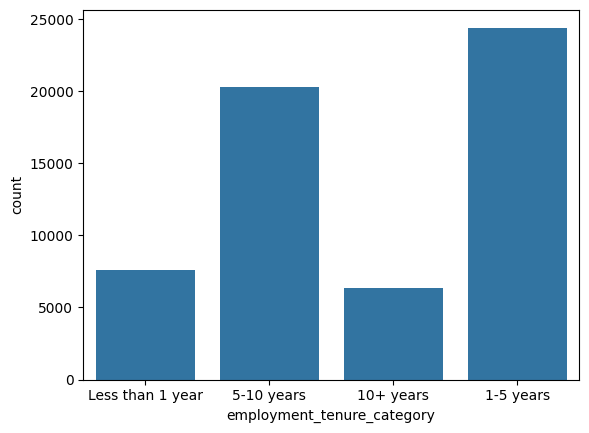

In [23]:
sns.countplot(data=df,x='employment_tenure_category')

<Axes: xlabel='credit_risk_score', ylabel='Count'>

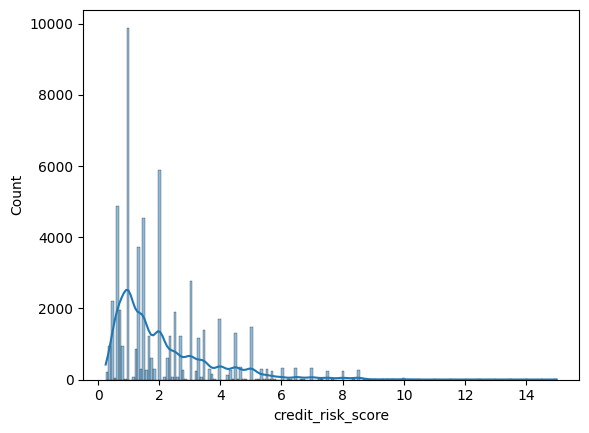

In [24]:
sns.histplot(data=df,x='credit_risk_score',kde=True)

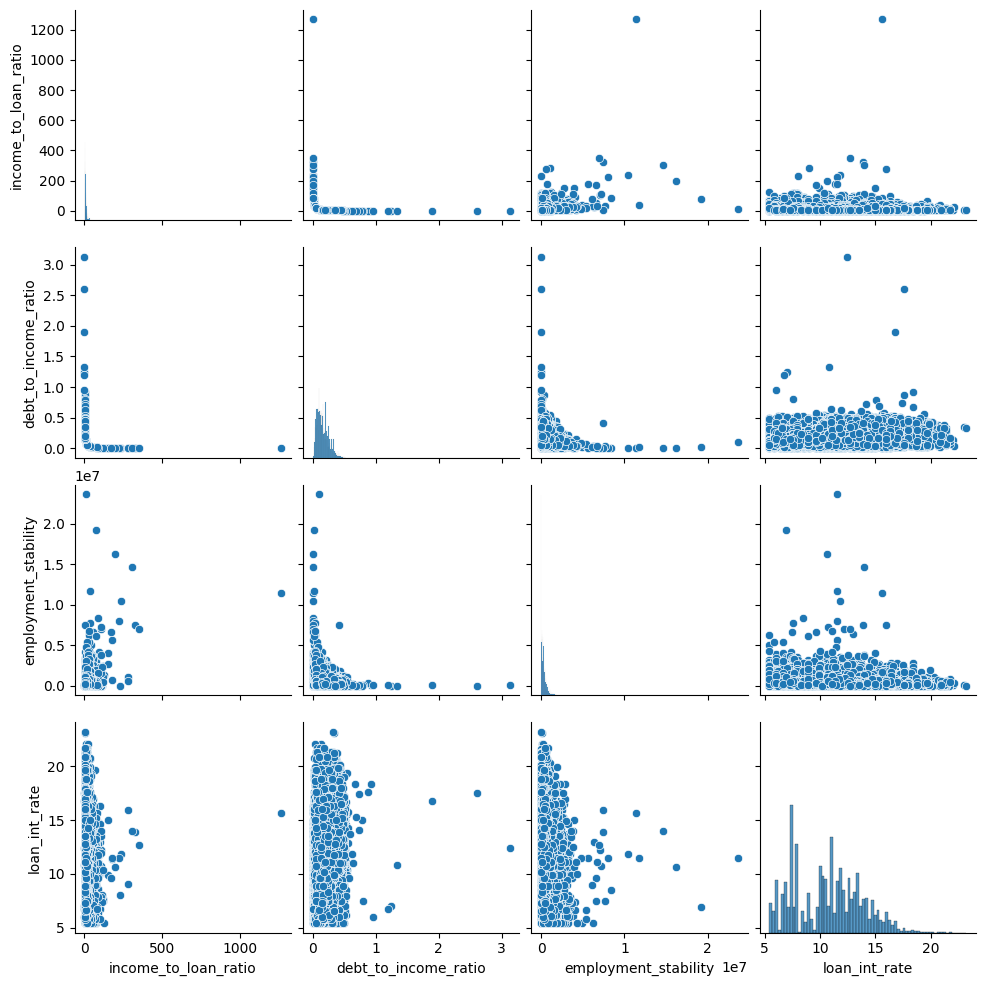

In [25]:

sns.pairplot(df, vars=['income_to_loan_ratio', 'debt_to_income_ratio', 'employment_stability', 'loan_int_rate'])
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

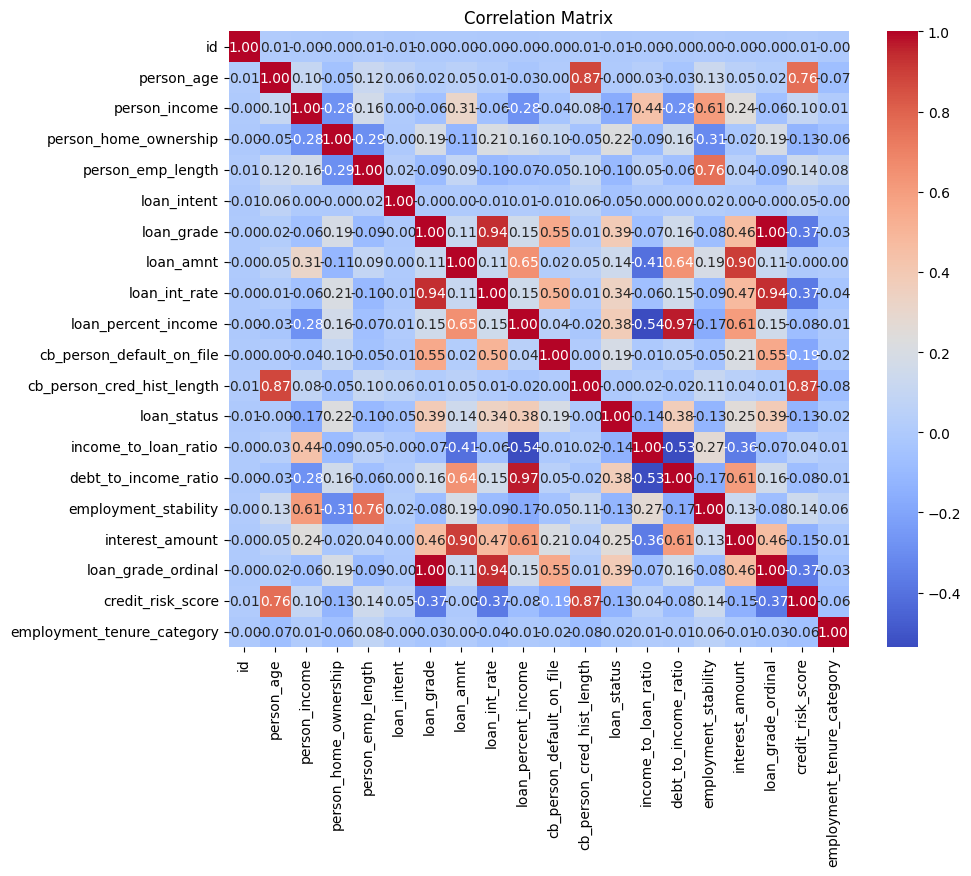

id                           -0.008138
person_age                   -0.001130
person_income                -0.169956
person_home_ownership         0.220167
person_emp_length            -0.100428
loan_intent                  -0.048751
loan_grade                    0.385908
loan_amnt                     0.144982
loan_int_rate                 0.338948
loan_percent_income           0.378280
cb_person_default_on_file     0.186962
cb_person_cred_hist_length   -0.003030
loan_status                   1.000000
income_to_loan_ratio         -0.135994
debt_to_income_ratio          0.375608
employment_stability         -0.127317
interest_amount               0.253473
loan_grade_ordinal            0.385908
credit_risk_score            -0.125089
employment_tenure_category   -0.020173
Name: loan_status, dtype: float64


In [35]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
print(correlation_matrix['loan_status'])


In [27]:
loan_grade_stats = df.groupby('loan_grade')[['loan_amnt', 'person_income', 'loan_int_rate']].mean()
print(loan_grade_stats)


pivot_table = pd.pivot_table(df, values=['loan_amnt', 'person_income', 'loan_int_rate'],
                             index='loan_intent', columns='loan_grade', aggfunc='mean')
print(pivot_table)

               loan_amnt  person_income  loan_int_rate
loan_grade                                            
A            8447.103746   66154.376001       7.335176
B            9622.485637   64859.850735      11.034733
C            9009.894889   61150.680953      13.510343
D           10521.468017   58840.785658      15.404599
E           12176.313181   62265.151635      16.930961
F           12833.892617   61029.442953      18.610940
G           12559.090909   50941.575758      20.327576
                     loan_amnt                                           \
loan_grade                   A             B            C             D   
loan_intent                                                               
DEBTCONSOLIDATION  8422.236998   9619.787957  8871.260429  10335.833333   
EDUCATION          8306.893424   9566.472460  8761.678543  10318.093607   
HOMEIMPROVEMENT    9087.424172  11009.101942  9996.554622  11264.877168   
MEDICAL            8141.100433   9027.661311  8654.2015

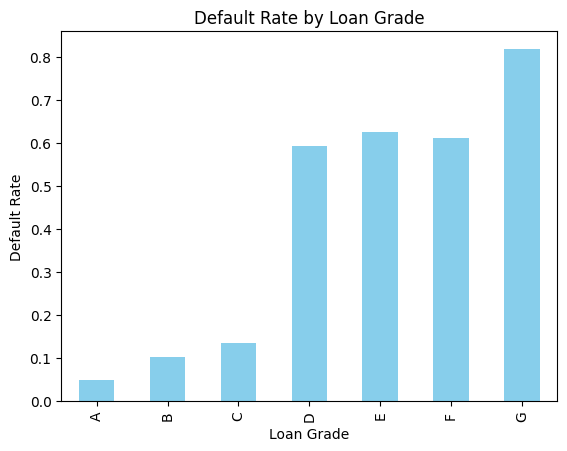

In [28]:
default_rate_by_grade = df.groupby('loan_grade')['loan_status'].mean()
default_rate_by_grade.plot(kind='bar', color='skyblue', title="Default Rate by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Default Rate")
plt.show()

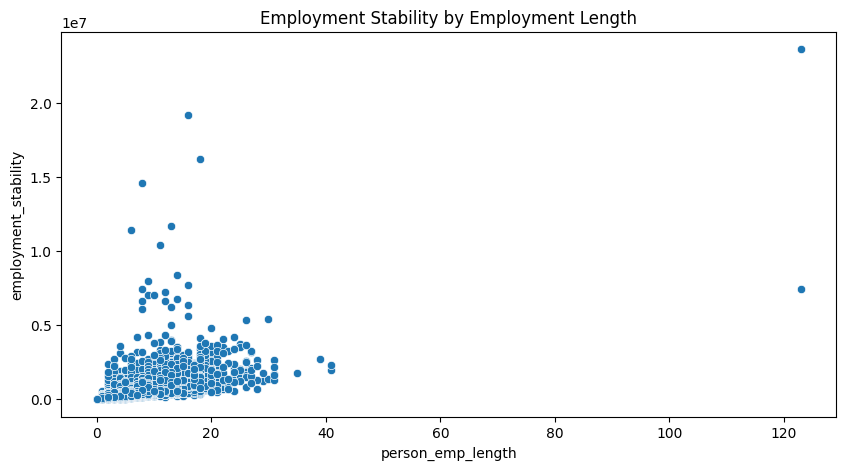

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='person_emp_length', y='employment_stability', data=df)
plt.title("Employment Stability by Employment Length")
plt.show()


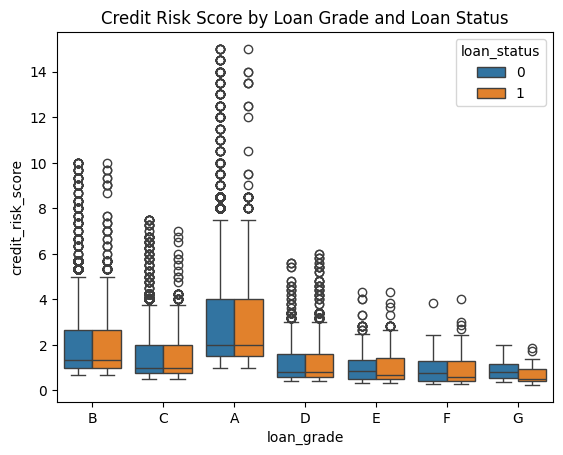

In [30]:
sns.boxplot(x='loan_grade', y='credit_risk_score', hue='loan_status', data=df)
plt.title("Credit Risk Score by Loan Grade and Loan Status")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10087
           1       0.73      0.63      0.68      1642

    accuracy                           0.92     11729
   macro avg       0.84      0.80      0.81     11729
weighted avg       0.91      0.92      0.91     11729



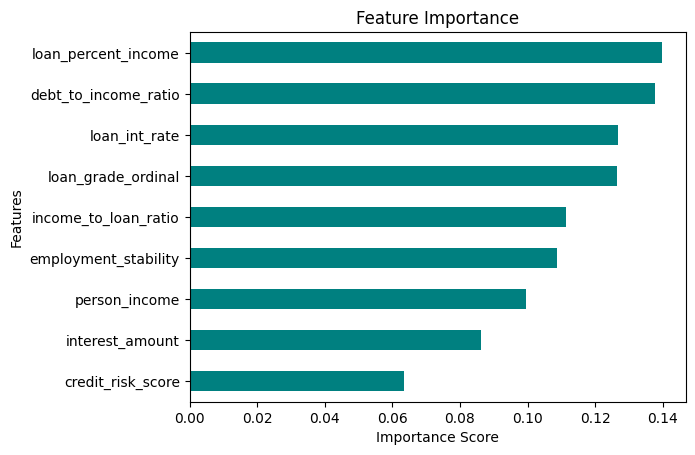

In [37]:
from sklearn.preprocessing import StandardScaler


selected_features = [
    'loan_grade_ordinal', 'loan_percent_income', 'debt_to_income_ratio',
    'loan_int_rate', 'interest_amount', 'person_income',
    'income_to_loan_ratio', 'employment_stability', 'credit_risk_score'
]


X = df[selected_features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating performance
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting Feature Importance
importances = pd.Series(model.feature_importances_, index=selected_features)
importances.sort_values().plot(kind='barh', color='teal', title="Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()